# SVM y Arboles de Decisión


## Librerias

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report


# from yellowbrick.classifier import ConfusionMatrix
# from yellowbrick.classifier import ClassPredictionError
# from yellowbrick.classifier import ROCAUC
# from yellowbrick.style import set_palette

## Cargar los datos que limpiamos de `exploratory.ipynb`

In [5]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

y_train = df_train["class"].values
X_train = df_train.drop(["class"], axis=1).values

y_test = df_test["class"].values
X_test = df_test.drop(["class"], axis=1).values

# liberar de memoria
del(df_train)
del(df_test)

In [6]:
y_test.shape

(16949,)

## Data Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

del(X_train)

<a id='7'></a><br>
# Train / Validation Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size = 0.33, random_state = 42)

In [9]:
print("shapes")
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_val", X_val.shape)
print("y_val", y_val.shape)

print("X_val", X_test.shape)
print("y_val", y_test.shape)

shapes
X_train (81352, 9)
y_train (81352,)
X_val (40070, 9)
y_val (40070,)
X_val (16949, 9)
y_val (16949,)


# Clasificadores

## SVM Classifier 

In [10]:
svm_clf = svm.SVC(kernel='rbf', C=1)
svm_clf.fit(X_train, y_train)


SVC(C=1)

In [11]:
y_pred = svm_clf.predict(X_val)

In [ ]:
set(y_pred)

In [12]:
score = svm_clf.score(X_val, y_val)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.963


In [25]:
classes = [0,1,2]
classes_names = ['GALAXY','STAR','QSO']

<a id='10'></a><br>
### Confusion Matrix

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# prediccion
y_pred = svm_clf.predict(X_val)

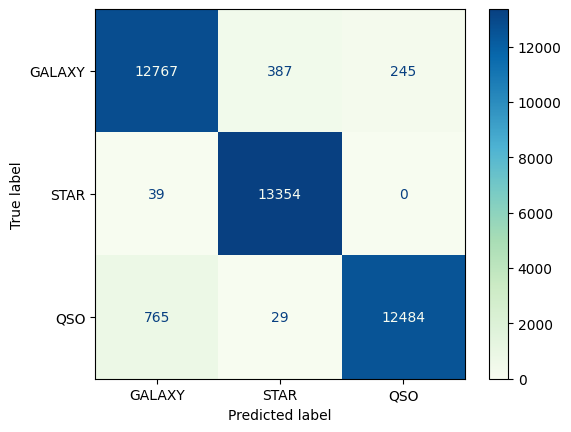

              precision    recall  f1-score   support

      GALAXY       0.94      0.95      0.95     13399
        STAR       0.97      1.00      0.98     13393
         QSO       0.98      0.94      0.96     13278

    accuracy                           0.96     40070
   macro avg       0.96      0.96      0.96     40070
weighted avg       0.96      0.96      0.96     40070



In [26]:
# Matriz de confusion
cm = confusion_matrix(y_val, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot(cmap='GnBu')  # Puedes usar diferentes mapas de colores

plt.show()

# Imprimir el informe de clasificación (similar al classification_report de Yellowbrick)
print(classification_report(y_val, y_pred, target_names=classes_names))


<a id='12'></a><br>
### ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Obtener las predicciones de probabilidad del modelo
y_score = svm_clf.decision_function(X_val)


In [32]:
# Convertir y_val a formato binario (one-vs-rest)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
n_classes = y_val_bin.shape[1]

y_val_bin[:5]

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

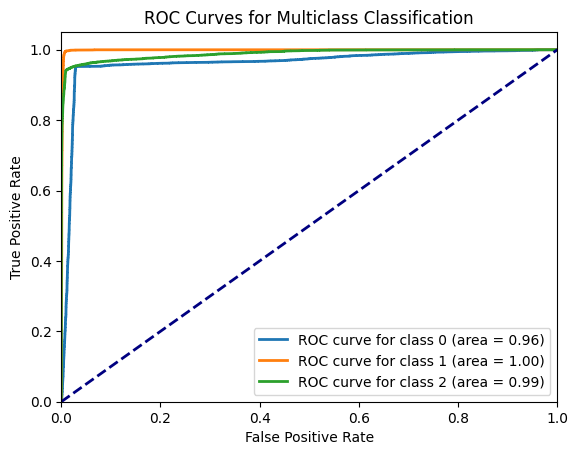

In [31]:
# Graficar la curva ROC para cada clase
plt.figure()

for i in range(n_classes): # iteramos cada clase
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_score[:, i]) # dentro de cada clase hacemos una curva ROC
    roc_auc = auc(fpr, tpr) # area under curve
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

# Graficar la diagonal
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

<a id='13'></a><br>
### Class Prediction Error

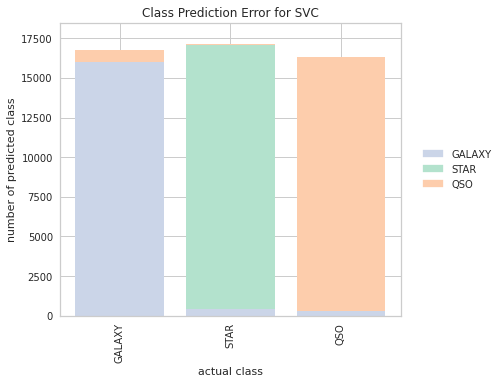

<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear un DataFrame de predicciones y clases reales
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})

# Contar los errores de predicción por clase
class_errors = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'], margins=True)

# Mostrar la tabla de errores de predicción
print(class_errors)

# Visualizar los errores de predicción
class_errors_normalized = class_errors.div(class_errors['All'], axis=0)
class_errors_normalized.drop('All', axis=1, inplace=True)

class_errors_normalized.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(10,6))
plt.title('Class Prediction Error')
plt.ylabel('Proportion of Predictions')
plt.xlabel('Actual Class')
plt.show()


<a id='14'></a><br>
## Random Forest Classifier

In [ ]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.984


<a id='15'></a><br>
### Confusion Matrix

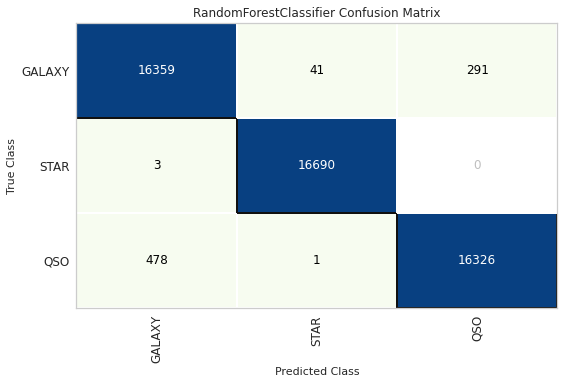

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

<a id='16'></a><br>
### Classification Report

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16691
           1       1.00      1.00      1.00     16693
           2       0.98      0.97      0.98     16805

    accuracy                           0.98     50189
   macro avg       0.98      0.98      0.98     50189
weighted avg       0.98      0.98      0.98     50189



<a id='17'></a><br>
### ROC Curve

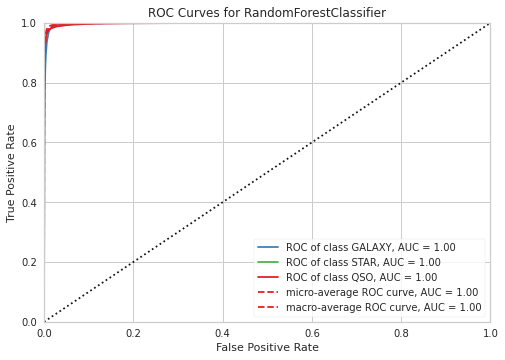

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(r_forest, classes=["GALAXY", "STAR", "QSO"])

set_palette('bold')

visualizer.fit(x_train, y_train)       
visualizer.score(x_test, y_test)        
visualizer.show()                      

<a id='18'></a><br>
### Class Prediction Error

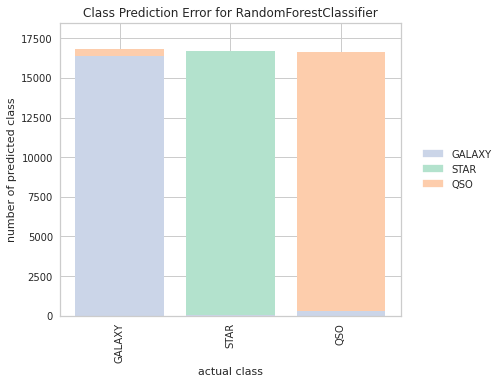

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(r_forest, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()                       